# **Проект по классификации оттока клиентов.**
Прогнозирование оттока клиентов на основе датасета Kaggle, содержащего информацию о 10 000 банковских клиентах. Используемые модели: логистическая регрессия, SVM, решающее дерево, случайный лес и XGBoost.

## **Скачивание необходимых библиотек**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn import metrics
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score


## **Cкачивание данных**

In [3]:
url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
data = pd.read_csv(url, index_col='RowNumber')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Общее инфо об данных:**

Мы используем набор данных Churn Modelling с платформы Kaggle. Этот набор данных содержит информацию о 10 000 клиентах банка, включая следующие данные:

**Идентификаторы клиента** (RowNumber, CustomerId, Surname);

**Географическое расположение** (Geography);

**Пол** (Gender);

**Возраст** (Age);

**Кредитный рейтинг** (CreditScore);

**Годовой доход** (EstimatedSalary);

**Стаж обслуживания в банке** (Tenure);

**Количество используемых продуктов** (NumOfProducts);

**Активность клиента** (HasCrCard, IsActiveMember);

**Баланс счёта** (Balance);

**Целевая переменная** — факт ухода клиента (Exited) — указывает, покинул ли клиент банк


## **Получение общее инфо об данных**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


По выше указанным данным мы можем сделать вывод об отсутствии пустых ячеек. Все столбцы имеют необходимый им тип данных.

In [5]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


По выше указанным данным мы можем сделать вывод об отсутствии аномальных или же не подходящих данных в каждом столбце.

In [6]:
data = data.drop(['CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Так как столбцы CustomerId и Surname не оказывают большого влияние на наши модели я решил их удалить.

## **Визуализация данных**

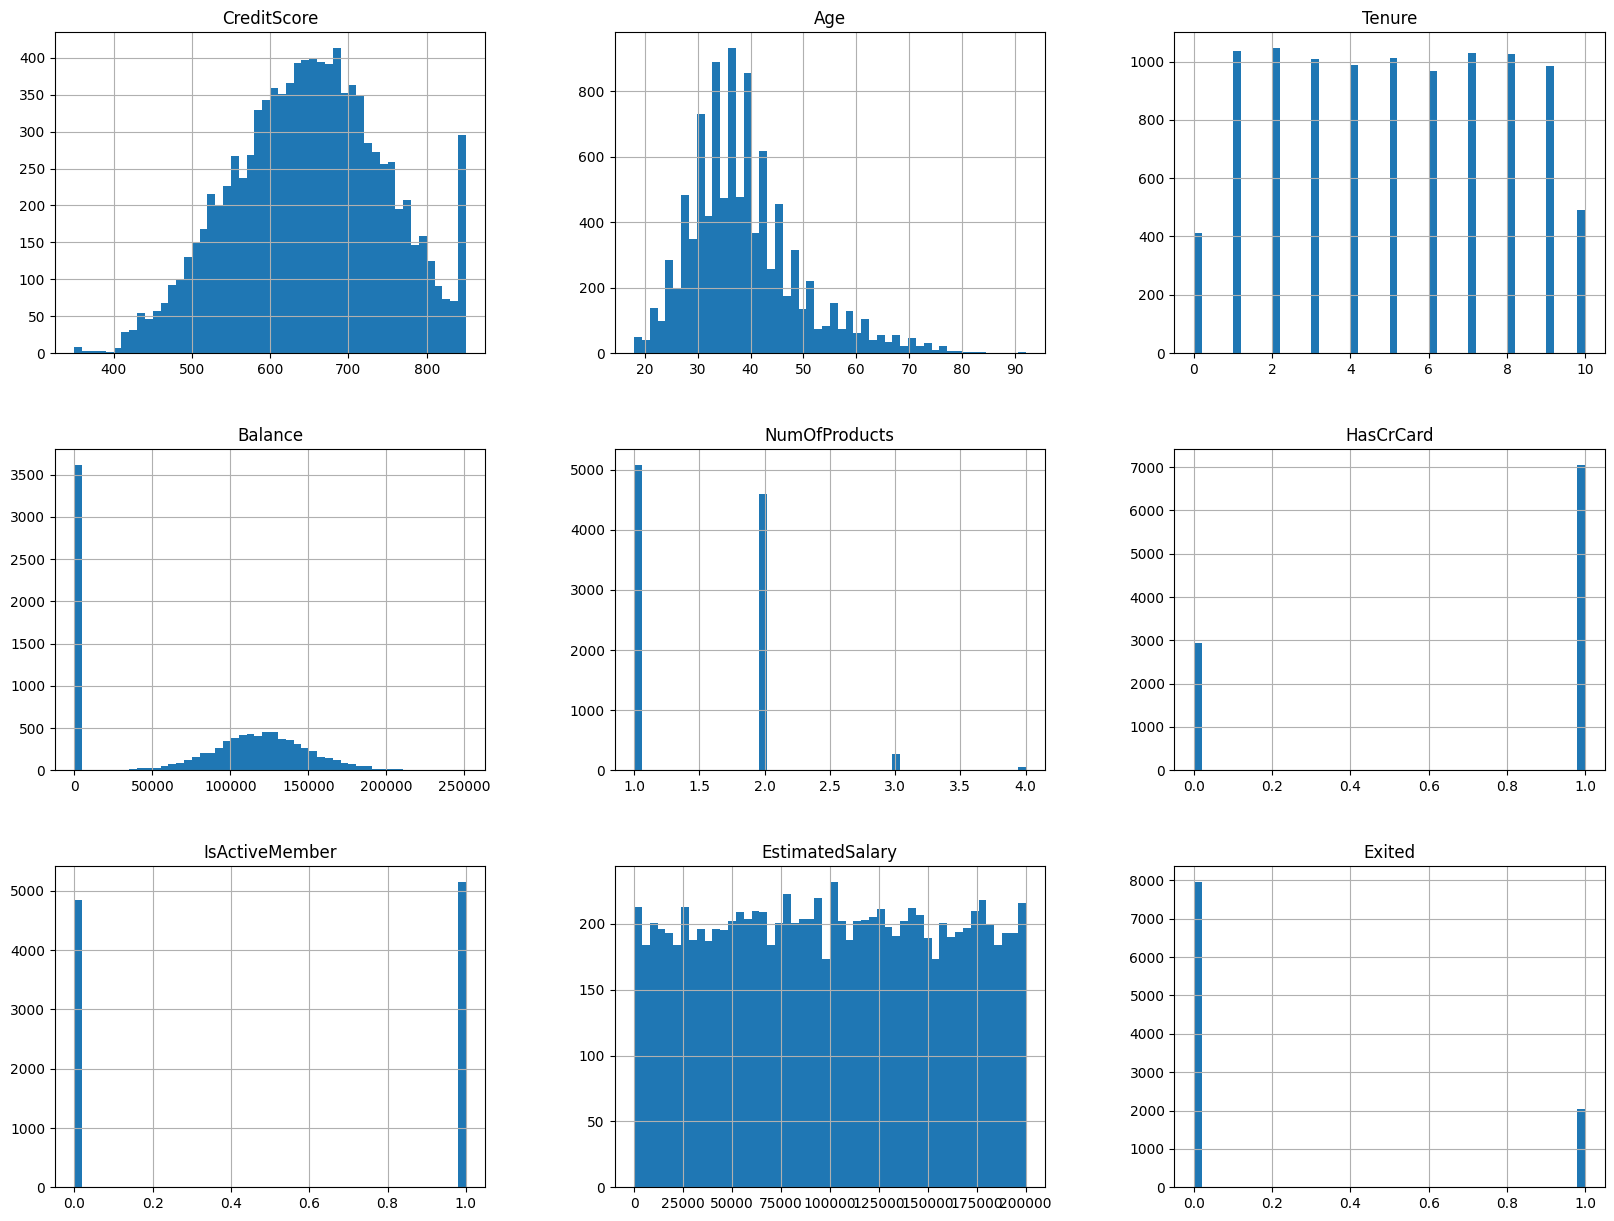

In [7]:
data.hist(bins=50, figsize=(20,15))
plt.show()

На фото мы можем видеть дистрибуцию числовых данных нашей таблицы. Даже если имеются неординарная дистрибуция CreditScore>800 и Balance=0 мы попробуем перейти на машинное обучение и посмотреть влияние качества данных на наш модель.
Я не стал их сбрасывать так как при сбросе Balance=0 у нас потеряется 3617 строк - это 36% наших данных что плохо отразится на обучениии.

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data_num = data.drop(["Gender", "Geography"], axis=1)
data_num.corrwith(data["Exited"]).sort_values(ascending=False)

,0
Exited,1.000000
Age,0.285323
Balance,0.118533
EstimatedSalary,0.012097
HasCrCard,-0.007138
Tenure,-0.014001
CreditScore,-0.027094
NumOfProducts,-0.047820
IsActiveMember,-0.156128


По данным выше мы можем видеть корреляцию между параметрами и с нашим Label.

## **Подготовка данных на машинное обучение**

**Работа с текскотыми столбцами**

In [10]:
data["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [11]:
data["Geography"]=data["Geography"].replace({"Germany":0, "France":1, "Spain":2})

/tmp/ipython-input-11-1953026288.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Geography"]=data["Geography"].replace({"Germany":0, "France":1, "Spain":2})


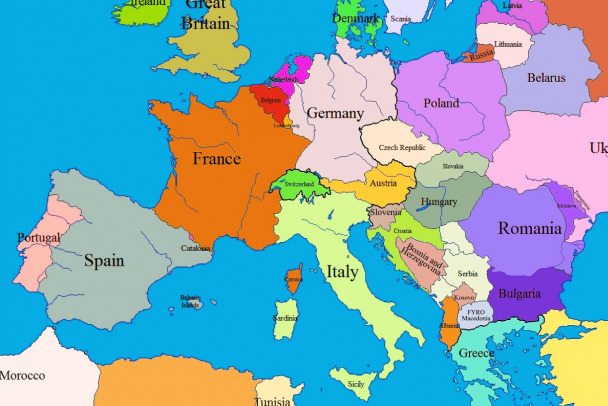

Выше я использовал именно способ replace и значения на которых я заменяю страны тоже имеют значения.
Если мы посмотрим на карте мира:
*   Германия близка Франции
*   Франция близка Испании

Соотствующию значения тоже математически близки друг к другу.

In [12]:
ordinal_encoder = OrdinalEncoder()
data["Gender"] =ordinal_encoder.fit_transform(data[["Gender"]])


In [13]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,1,0.0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0.0,41,1,83807.86,1,0,1,112542.58,0
3,502,1,0.0,42,8,159660.80,3,1,0,113931.57,1


In [14]:
data["Gender"]=data["Gender"].astype(np.int32)

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,1,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,1,0,42,8,159660.80,3,1,0,113931.57,1
4,699,1,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Разделение данных на train test split**

In [16]:
train_set, test_set= train_test_split(data, test_size=0.2, random_state=35)

**Разделение параметров от labels**

In [17]:
x_train=train_set.drop("Exited", axis=1)
y_train=train_set["Exited"].copy()

x_test=test_set.drop("Exited", axis=1)
y_test=test_set["Exited"].copy()


**Стандартизация**

In [18]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

## **Машинное обучение**

**Logistic Regession**

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1600
           1       0.61      0.19      0.29       400

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Точность моделя: 0.8135


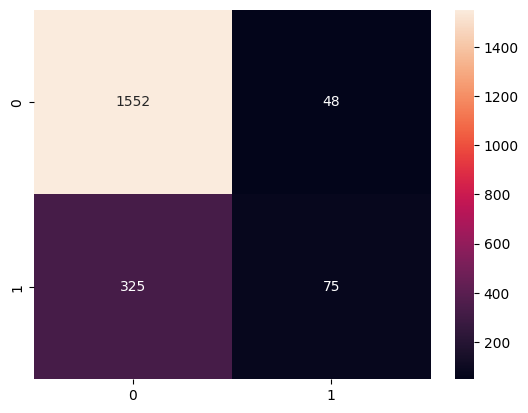

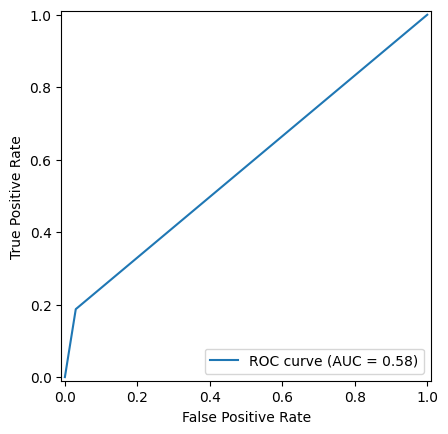

In [19]:
#Обучение
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

#Прогнозирование
y_pred=LR_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Точность моделя:", metrics.accuracy_score(y_test,y_pred))

#Сonfusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

#ROC Сurve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Мы можем видеть что точность моделя(Logistic Regression): 81%

Однако если мы будем анализировать Confusion matrix:
Из 400 покинувших клиентов мы смогли спрогнозировать только уход 75.

В коэффициентах Precission и Recall мы можем видеть:
-прогноз ухода клиента очень маленький что можно увидеть с помощью Recall = 0.29

График ROC тоже демонстрирует нам плохое качество нашего моделя, так как график относительно близок к линию 45 градусов.

**Support Vector Machine модель**

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1600
           1       0.78      0.37      0.51       400

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.71      2000
weighted avg       0.85      0.85      0.83      2000

Точность моделя: 0.854


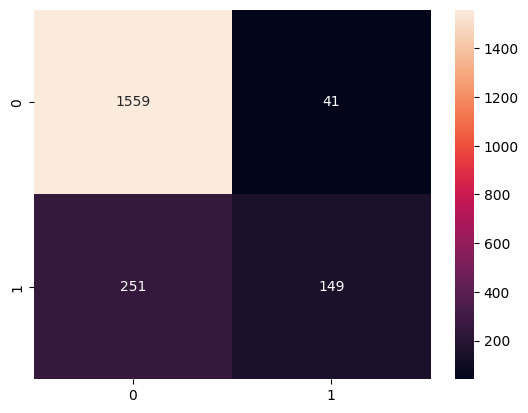

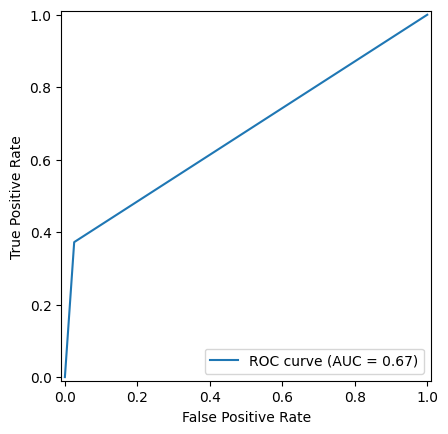

In [20]:
#Обучение
svc = SVC()
svc.fit(x_train, y_train)

#Прогнозирование
y_pred=svc.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Точность моделя:", metrics.accuracy_score(y_test,y_pred))

#Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Мы можем видеть что точность моделя(Support Vector Machine): 85%

Confusion matrix:
Из 400 покинувших клиентов мы смогли спрогнозировать только уход 149. Что довольно лучше чем Logistic Regression модель.

В коэффициентах Precission и Recall мы можем видеть:
-прогноз ухода клиента  маленький что можно увидеть с помощью Recall = 0.37

График ROC тоже демонстрирует по лучше качество нашего моделя, так как график относительно отделилась от линии 45 градусов.

**Decision Tree модель**

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1600
           1       0.48      0.51      0.49       400

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.79      0.79      2000

Точность моделя: 0.7905


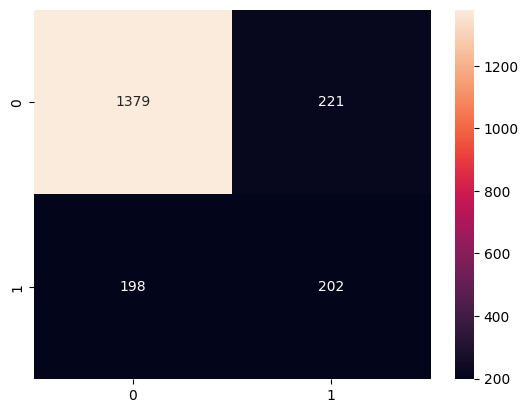

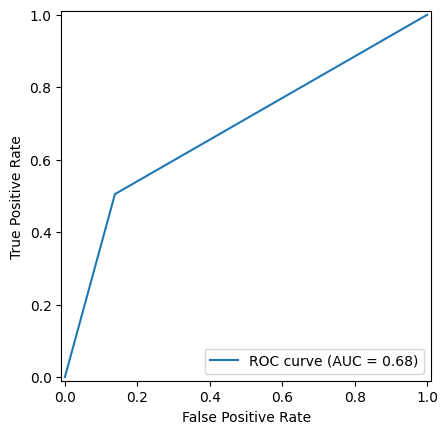

In [21]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#Прогнозирование
y_pred=tree_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Точность моделя:", metrics.accuracy_score(y_test,y_pred))

#Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Мы можем видеть что точность моделя(Decision Tree): 78%(относительно меньше чем 2 предыдушие модели)

Confusion matrix:
Из 400 покинувших клиентов мы смогли спрогнозировать только уход 197. Что еще лучше чем SVM модель в котором мы могли спрогнозировать 149.

В коэффициентах Precission и Recall мы можем видеть:
-прогноз ухода клиента  маленький что можно увидеть с помощью Recall = 0.51 что намного лучше

График ROC тоже демонстрирует по лучше качество нашего моделя, так как график относительно отделилась от линии 45 градусов.

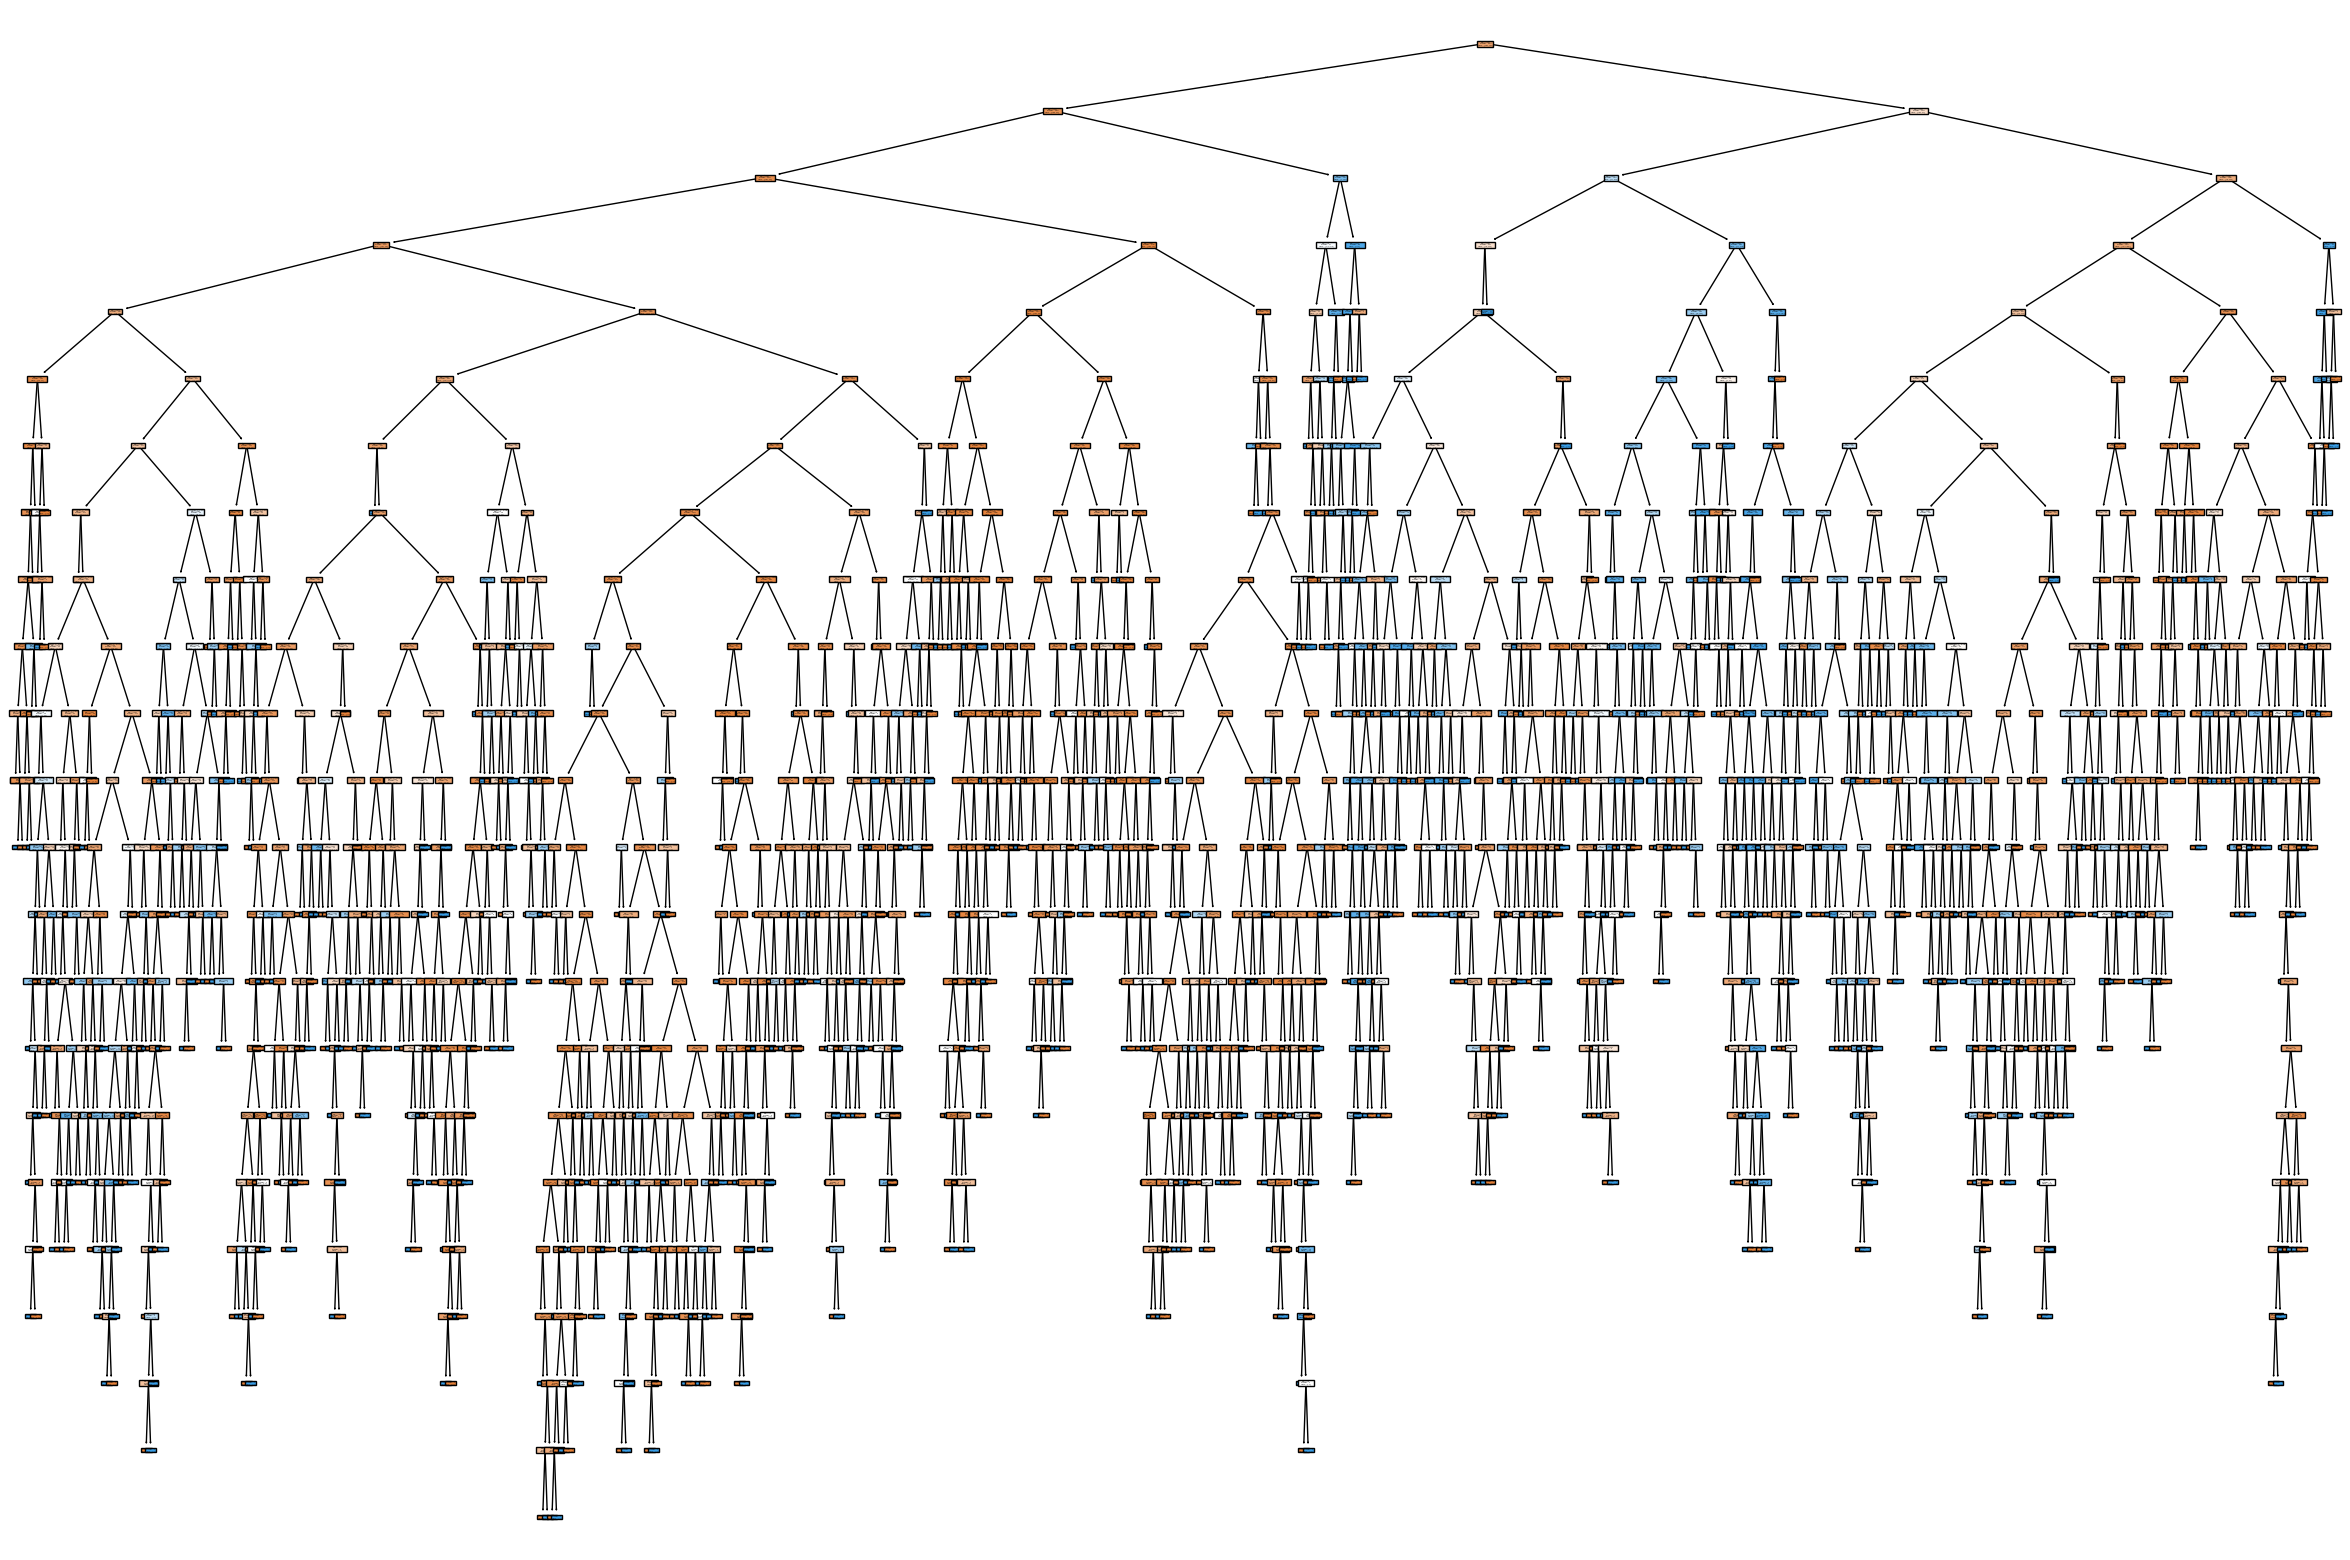

In [22]:
cols = data.drop('Exited', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

Выше мы можем видеть график нашего дерева.

**Random Forest модель**

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1600
           1       0.65      0.48      0.56       400

    accuracy                           0.84      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.83      0.84      0.84      2000

Точность моделя: 0.845


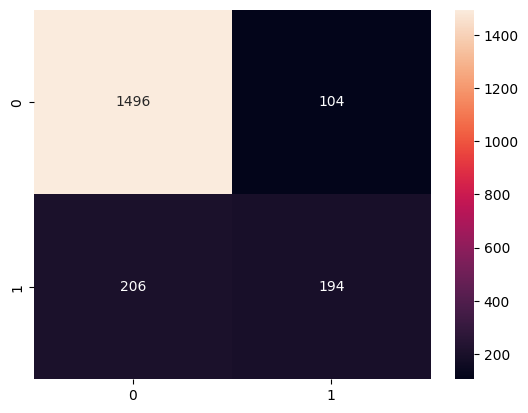

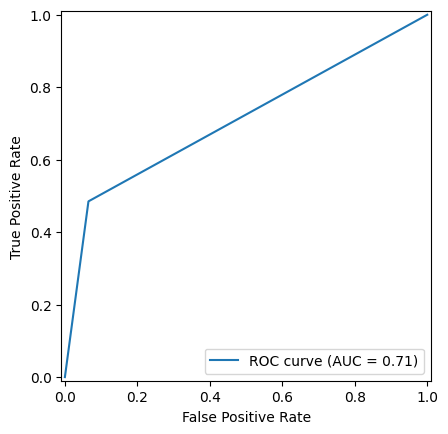

In [23]:
#Обучение
rf_model = RandomForestClassifier(n_estimators=5)
rf_model.fit(x_train, y_train)

#Прогнозирование
y_pred=rf_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Точность моделя:", metrics.accuracy_score(y_test,y_pred))

#Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Выше n_estimators было указано случайно.

In [24]:
param_grid = {'n_estimators':np.arange(1,25)}
rf_model_new = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf_model_new.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [25]:
rf_model_new.best_params_

{'n_estimators': np.int64(23)}

Выше мы с помощью GridSearch нашли самый оптимальное значение n_estimators

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1600
           1       0.72      0.46      0.56       400

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

Точность моделя: 0.855


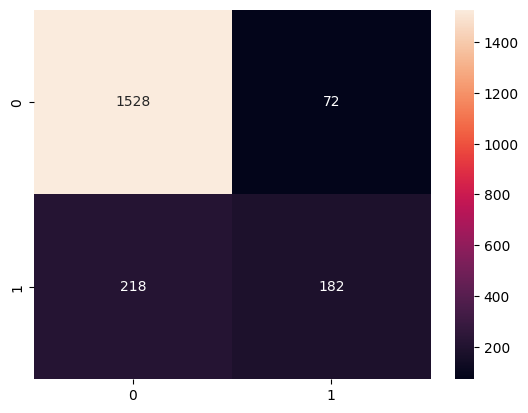

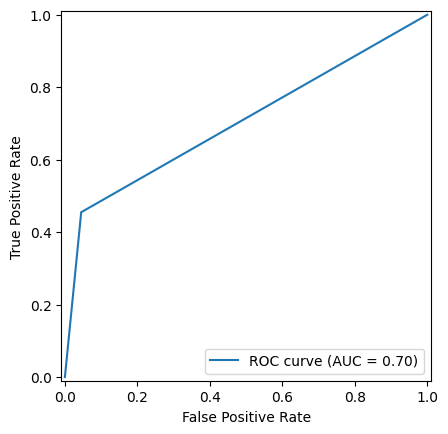

In [26]:
#Обучение
rf_model = RandomForestClassifier(n_estimators=21)
rf_model.fit(x_train, y_train)

#Прогнозирование
y_pred=rf_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Точность моделя:", metrics.accuracy_score(y_test,y_pred))

#Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

При n_estimators=5 который был случайно выбран оценка дает более качественные прогнозы.

Мы можем видеть что точность моделя(Random Forest): 84% что лучше чем Decision Tree model

Confusion matrix:
Из 400 покинувших клиентов мы смогли спрогнозировать только уход 194. C помощью этого моделя мы можем спрогнозировать почти 50% оттока клиентов что лучше чем все предыдущие модели.

В коэффициентах Precission и Recall мы можем видеть:
-прогноз ухода клиента  чуть больше что можно увидеть с помощью Recall = 0.48 что намного лучше

График ROC тоже демонстрирует еще лучше качество нашего моделя, так как график относительно больше чем другие модели отделилась от линии 45 градусов.

**XGBosst модель**

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1600
           1       0.37      0.60      0.46       400

    accuracy                           0.71      2000
   macro avg       0.63      0.67      0.63      2000
weighted avg       0.78      0.71      0.74      2000

Model aniqligi: 0.715


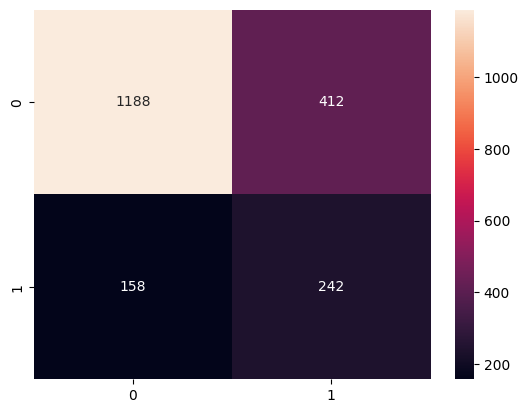

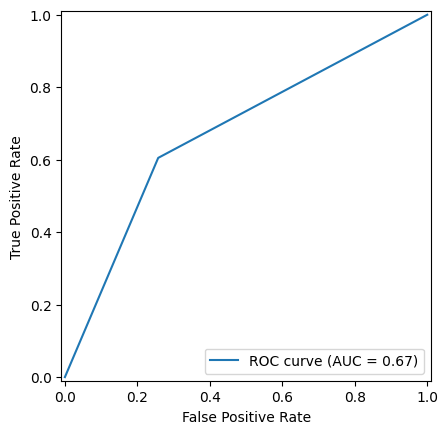

In [27]:
#Обучение
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

#Прогнозирование
y_pred = xgb_model.predict(x_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

#Сonfusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

##ROC Сurve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Мы можем видеть что точность моделя(XGBoost): 71%

Confusion matrix:
Из 400 покинувших клиентов мы смогли спрогнозировать только уход 242. C помощью этого моделя мы можем спрогнозировать почти 60% оттока клиентов что будет полезным для банка.

В коэффициентах Precission и Recall мы можем видеть:
-прогноз ухода большой что можно увидеть с помощью Recall = 0.60 что намного лучше

График ROC тоже демонстрирует относительно лучше качество нашего моделя, так как график относительно больше чем другие модели отделилась от линии 45 градусов.

## **Вывод**
Основываясь на выше обученных моделях и оценки прогнозов наших моделей.
Мы можем утверждать что XGBoost модель демонстрирует наилучшую качества прогноза оттока клиентов из банка.